Compute the auto-correlation of the CO and CH4 model spectra to determine dominate orders


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

In [62]:
model_dir = 'Models/1x_metallicity_1.0_CO_ratio/'

# load in model
sp        = 'CH4'
mod_file  = model_dir + 'pRT_data_full_{}.dat'.format(sp)
W_mod     = []
T_depth   = []
with open(mod_file, 'r') as data:
    lines = data.readlines()
    data.close()
for line in lines[4:]:
    v = line.split(' ')
    W_mod.append(float(v[0]))
    T_depth.append(float(v[1].split('\n')[0]))
W_mod = np.array(W_mod)#/1e3
T_depth = np.array(T_depth)

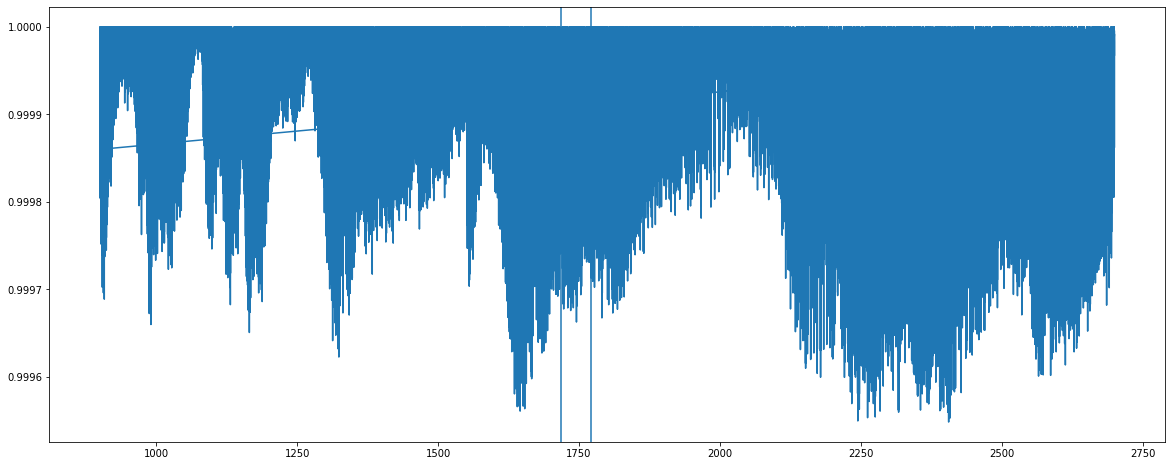

In [63]:
plt.figure(figsize=(20,8))
plt.plot(W_mod,T_depth)
plt.axvline(wmod_ord[35][0])
plt.axvline(wmod_ord[35][-1])

In [64]:
## split into orders

## load in some data for wlen reference
datafile = 'Input_data/spirou/data_spirou.pkl'
with open(datafile,'rb') as specfile:
    A = pickle.load(specfile)
orders,WW,Ir,blaze,Ia,T_obs,phase,window,berv,vstar,airmass,SN = A

In [65]:
wmod_ord = []
fmod_ord = []
for iord in range(len(WW)):
    WW_ord = WW[iord]
    l = np.argwhere((WW_ord.min()<W_mod)*(W_mod<WW_ord.max()))[:,0]
    wmod_ord.append(W_mod[l])
    fmod_ord.append(T_depth[l])
    

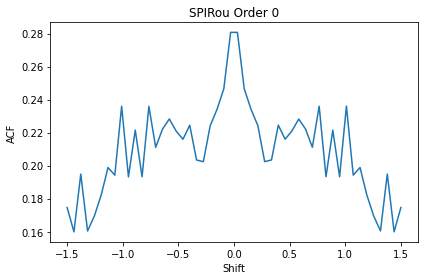

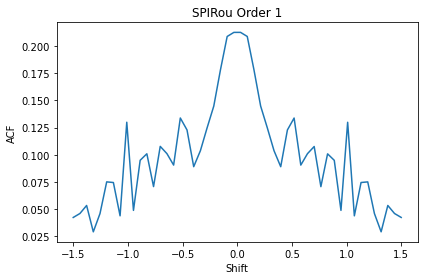

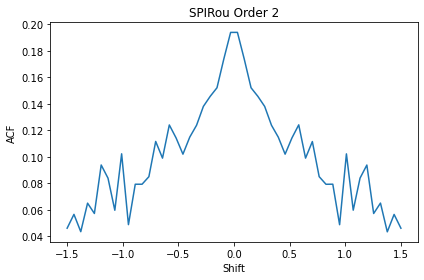

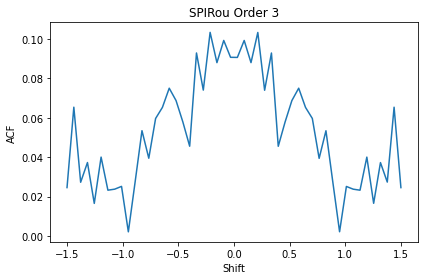

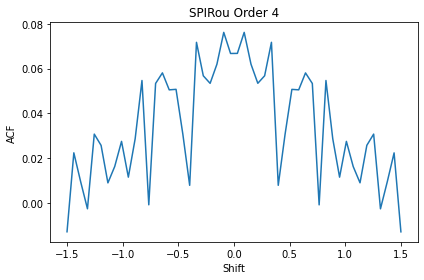

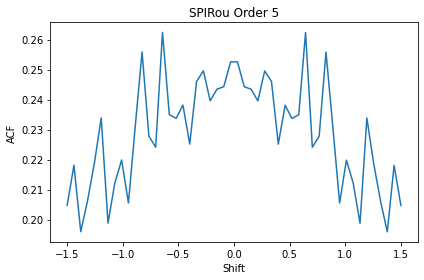

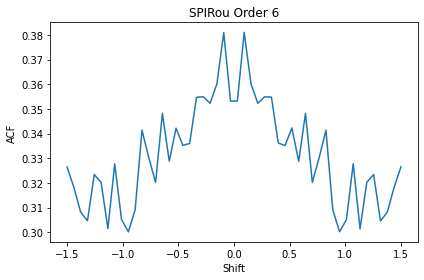

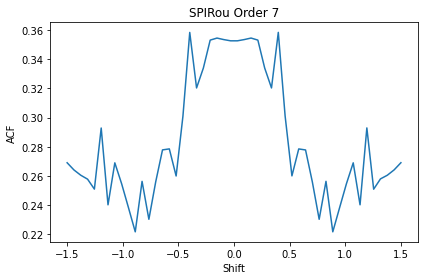

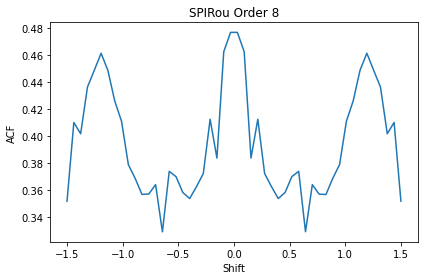

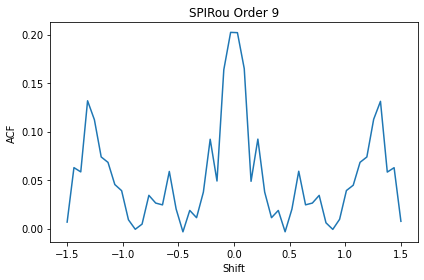

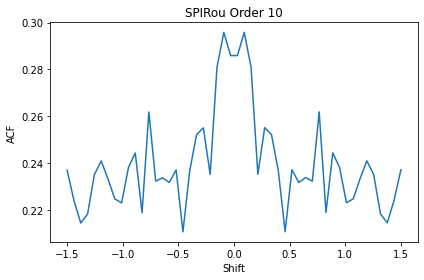

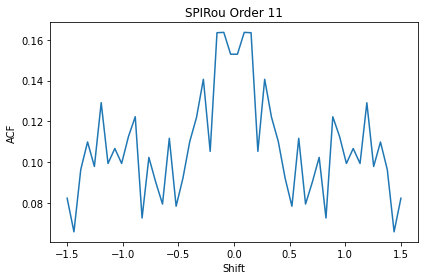

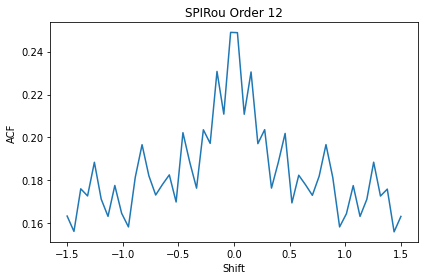

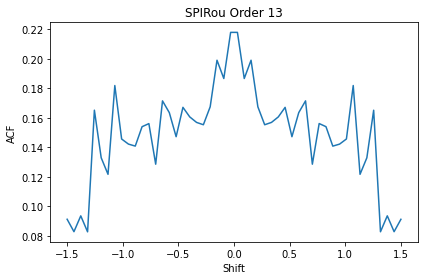

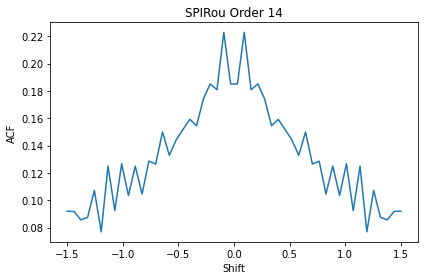

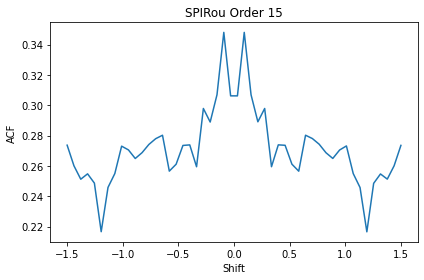

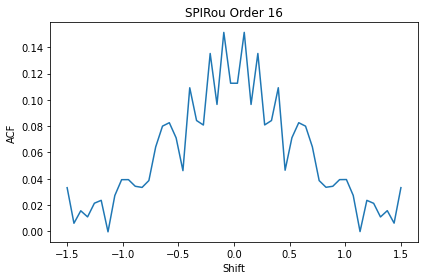

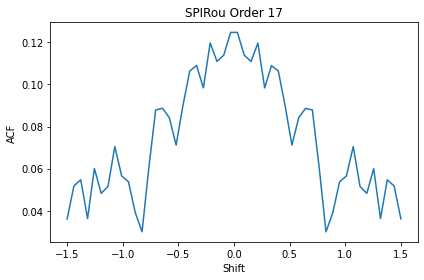

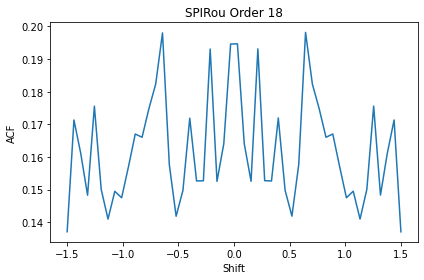

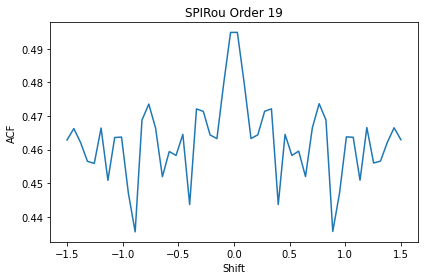

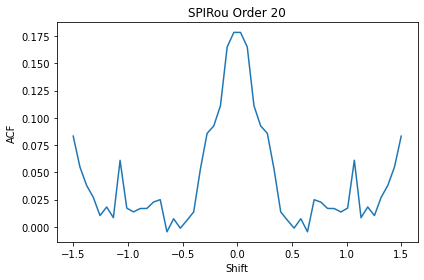

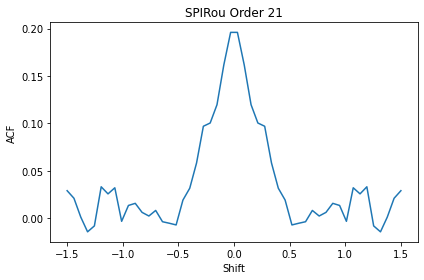

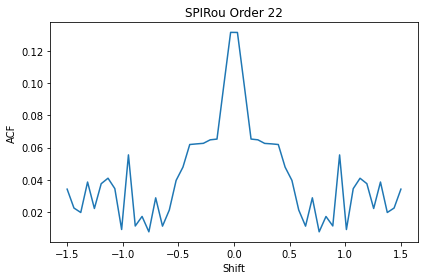

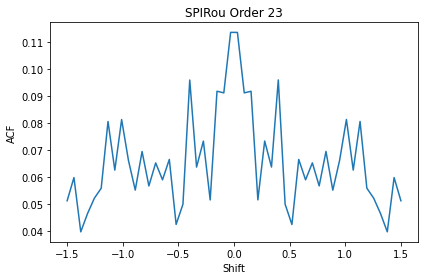

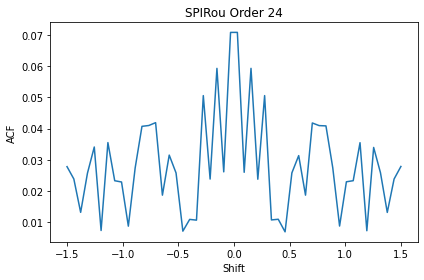

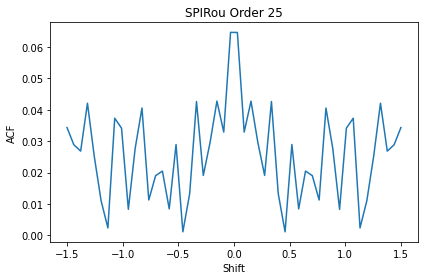

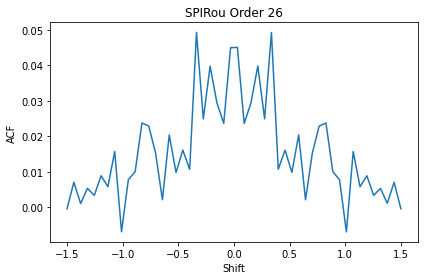

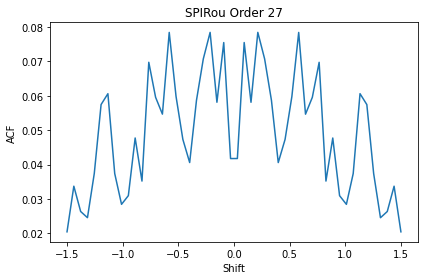

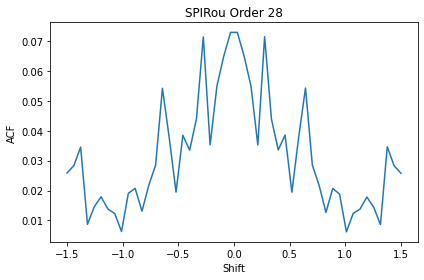

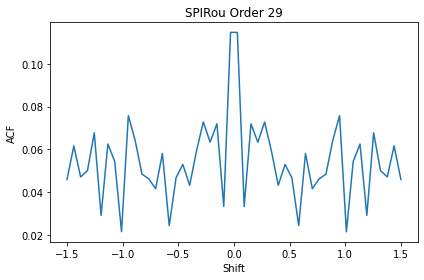

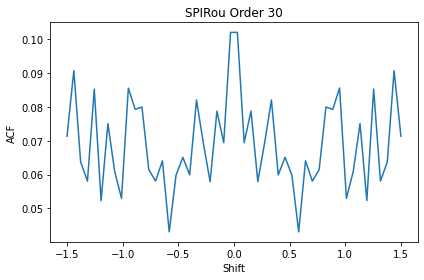

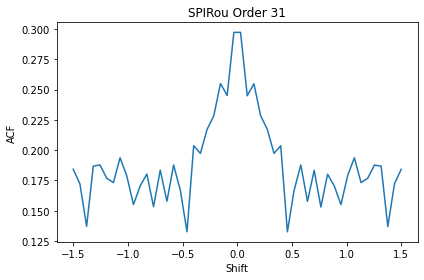

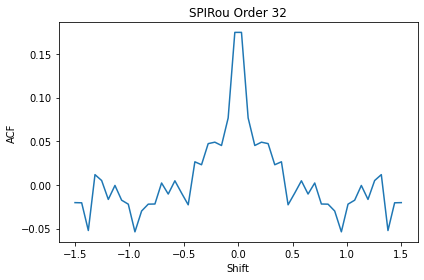

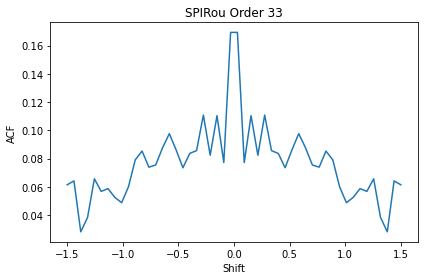

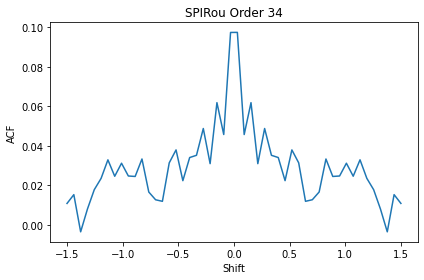

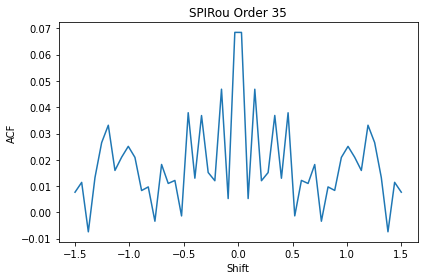

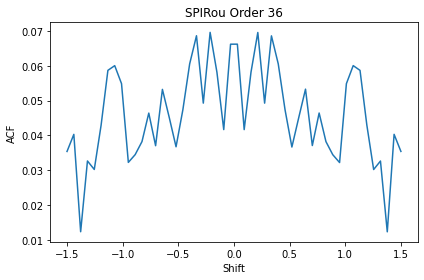

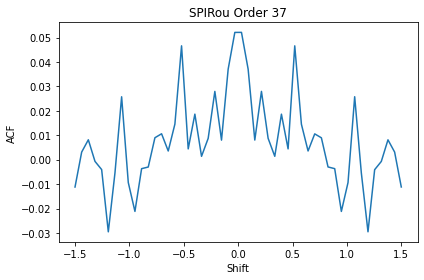

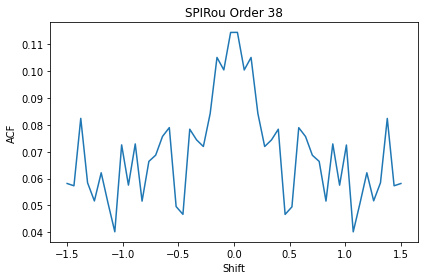

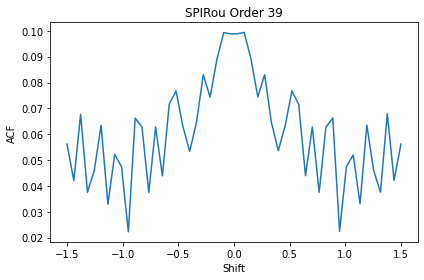

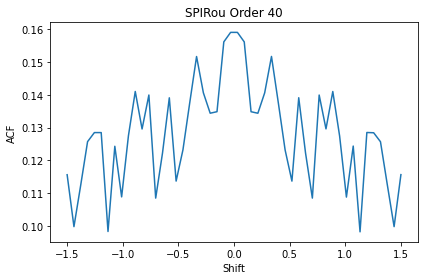

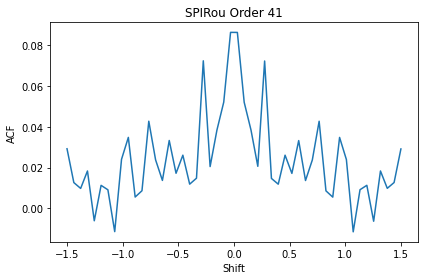

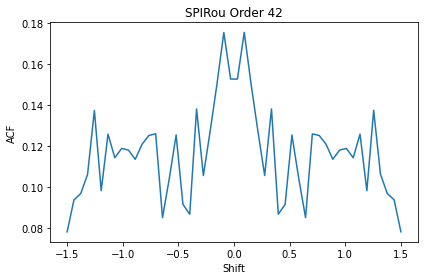

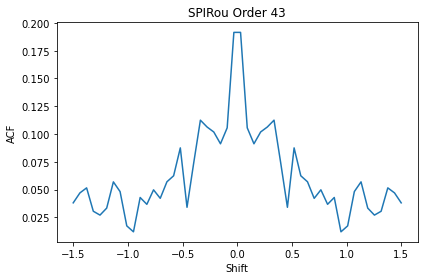

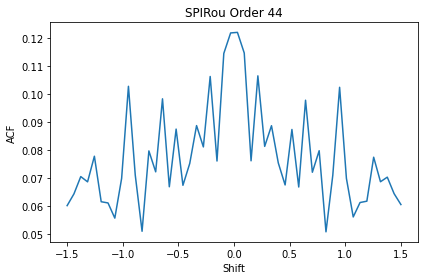

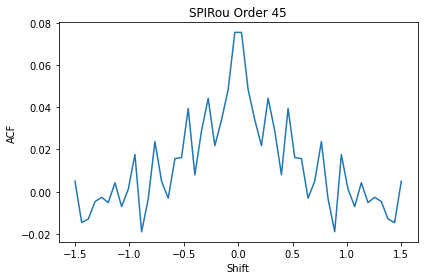

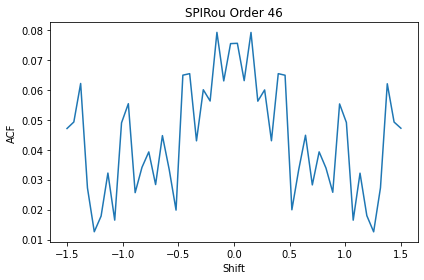

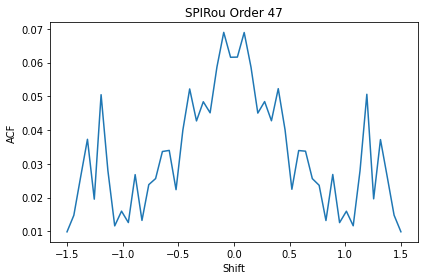

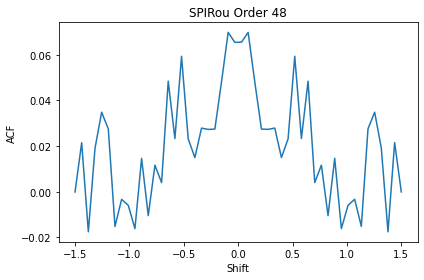

In [66]:
shifts = np.linspace(-1.5,1.5,50)
for iord in range(len(WW)):
    wl = wmod_ord[iord]
    fl = fmod_ord[iord]
    func = interp1d(wl,fl,bounds_error=False)
    ACF = np.zeros((len(shifts)))
    for i in range(len(shifts)):
        fl_shift = func(wl+shifts[i])
        l = np.isfinite(fl_shift)
        fl_shift = fl_shift[l]
        #ACF[i] = np.sum(np.correlate(fl,fl_shift))
        ACF[i] = pearsonr(fl[l],fl_shift)[0]
    plt.plot(shifts,ACF)
    plt.title('SPIRou Order {}'.format(iord))
    plt.ylabel("ACF")
    plt.xlabel('Shift')
    plt.tight_layout()
    plt.savefig('Input_data/spirou/ACFs/{}/ACF_{}_order{}.png'.format(sp,sp,iord))
    plt.show()